# TWSnet28 : Residual Autoencoder for Road Detection


In [129]:
import time
import numpy as np
from keras import models
from keras import layers
from keras import backend as K
from PIL import Image
from keras import optimizers
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import json
from glob import glob
import os
import src.residual_segnet_model as segnet
import src.segtools as segtools
import src.seg_resnet_model as segres
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
#get the data
in_dirc = '/contents/images/train'
val_dirc= '/contents/images/val'
x_, y_ = segtools.get_xy_data(in_dirc, 1)
n_classes = len(np.unique(y_))
y_ = segtools.pre_process_y(y_[0], n_classes)
input_shape = x_.shape[1:]
output_shape = y_.shape
class_weights = [19.10052513, 0.51344048] #pre-calculated for the full dataset.
print(input_shape, output_shape)

(256, 256, 3) (65536, 2)


In [123]:
#initial_filter = 32
#depth = 4
#model = segnet.residual_segnet(input_shape, output_shape, \
#                               n_classes, initial_filter, depth)
tensorboard = TensorBoard(log_dir='/contents/logs/', histogram_freq=0, write_graph=True, write_images=False)
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 32) 4736        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 32) 128         conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
dropout_1 

In [124]:
sample_size = len(glob('%s/a/*png'%in_dirc))
val_size = len(glob('%s/a/*png'%val_dirc))
nb_epoch = 1
batch_size = 18 
steps_per_epoch = sample_size // batch_size
validation_steps = val_size // batch_size
model_out = []
valid_out = []
for epoch in range(100):
#x_train, y_train = batch_gen(in_dirc, batch_size, gen_data=True)
#class_weights = segtools.get_weights(y_train)
    m = model.fit_generator(segtools.data_generator(in_dirc, batch_size=batch_size,\
                                                        augment_img=True),\
                                steps_per_epoch=steps_per_epoch, nb_epoch=nb_epoch,\
                                class_weight=class_weights, callbacks=[tensorboard])
    vm = model.evaluate_generator(segtools.data_generator(val_dirc, batch_size=batch_size),\
                                  steps=validation_steps)
    print('validation loss: %s, validation accuracy: %s'%(vm[0], vm[1]))
    model_out.append(m.history)
    valid_out.append(vm)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=247, callbacks=[<keras.ca..., class_weight=[19.100525..., epochs=1)`
  if sys.path[0] == '':


Epoch 1/1
247/247 [==============================] - 193s 780ms/step - loss: 0.1277 - categorical_accuracy: 0.9723
validation loss: 0.13012885492, validation accuracy: 0.971375530416
Epoch 1/1
247/247 [==============================] - 190s 769ms/step - loss: 0.0931 - categorical_accuracy: 0.9747
validation loss: 0.130322680013, validation accuracy: 0.971474247629
Epoch 1/1
247/247 [==============================] - 190s 769ms/step - loss: 0.0662 - categorical_accuracy: 0.9765
validation loss: 0.0913113423369, validation accuracy: 0.973290464011
Epoch 1/1
247/247 [==============================] - 190s 769ms/step - loss: 0.0586 - categorical_accuracy: 0.9777
validation loss: 0.0860132755881, validation accuracy: 0.973388607935
Epoch 1/1
247/247 [==============================] - 190s 769ms/step - loss: 0.0554 - categorical_accuracy: 0.9785
validation loss: 0.103926107287, validation accuracy: 0.973595667969
Epoch 1/1
247/247 [==============================] - 190s 769ms/step - loss: 0.

247/247 [==============================] - 190s 768ms/step - loss: 0.0415 - categorical_accuracy: 0.9827
validation loss: 0.0602955250577, validation accuracy: 0.977481818199
Epoch 1/1
247/247 [==============================] - 190s 768ms/step - loss: 0.0416 - categorical_accuracy: 0.9827
validation loss: 0.062066938999, validation accuracy: 0.977286725694
Epoch 1/1
247/247 [==============================] - 190s 769ms/step - loss: 0.0412 - categorical_accuracy: 0.9828
validation loss: 0.0774507412856, validation accuracy: 0.9768457727
Epoch 1/1
247/247 [==============================] - 190s 768ms/step - loss: 0.0416 - categorical_accuracy: 0.9827
validation loss: 0.0621617115357, validation accuracy: 0.977907911214
Epoch 1/1
247/247 [==============================] - 190s 768ms/step - loss: 0.0412 - categorical_accuracy: 0.9828
validation loss: 0.0751690410755, validation accuracy: 0.976240308718
Epoch 1/1
247/247 [==============================] - 190s 768ms/step - loss: 0.0414 - ca

247/247 [==============================] - 189s 767ms/step - loss: 0.0387 - categorical_accuracy: 0.9836
validation loss: 0.0569236806848, validation accuracy: 0.978393587199
Epoch 1/1
247/247 [==============================] - 189s 767ms/step - loss: 0.0388 - categorical_accuracy: 0.9836
validation loss: 0.0586008411239, validation accuracy: 0.978969151323
Epoch 1/1
247/247 [==============================] - 189s 767ms/step - loss: 0.0388 - categorical_accuracy: 0.9836
validation loss: 0.0645835608244, validation accuracy: 0.97742951133
Epoch 1/1
247/247 [==============================] - 190s 767ms/step - loss: 0.0388 - categorical_accuracy: 0.9836
validation loss: 0.0574980699881, validation accuracy: 0.978269834952
Epoch 1/1
247/247 [==============================] - 189s 767ms/step - loss: 0.0387 - categorical_accuracy: 0.9836
validation loss: 0.0703518366272, validation accuracy: 0.977018060467
Epoch 1/1
247/247 [==============================] - 189s 766ms/step - loss: 0.0387 - 

In [125]:
b = {k:[d[k][0] for d in model_out] for d in model_out for k,v in d.items()} 
for i in range(len(model.metrics_names)):
    b['validation_%s'%model.metrics_names[i]] = list(np.array(valid_out)[:,i])

t = time.strftime('%Y%m%d%H%M', time.gmtime())
os.makedirs('./fit_models/%s'%t)
model.save_weights('./fit_models/%s/seg_net.h5'%t)
# serialize model to JSON

with open('./fit_models/%s/seg_net.json'%t, 'w') as outfile:
    outfile.write(json.dumps(json.loads(model.to_json()), indent=2))
with open('/contents/fit_models/model_acc.json', 'w') as fout:
    json.dump(b, fout)

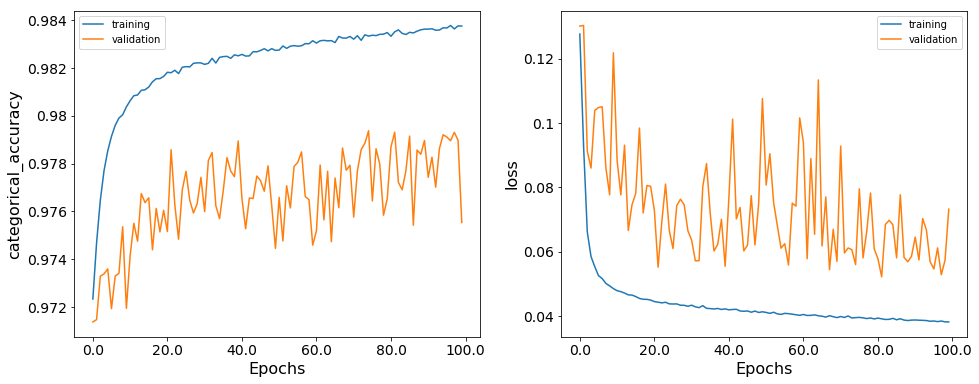

In [127]:
f, ax = plt.subplots(1,2,figsize=(16,6))
ax[1].plot(b['loss'], label ='training')
ax[1].plot(b['validation_loss'], label = 'validation')
ax[0].plot(b['categorical_accuracy'], label = 'training')
ax[0].plot(b['validation_categorical_accuracy'], label = 'validation')

keys = sorted(list(b.keys()))[:2]
for i in range(len(keys)):
    ax[i].set_xlabel('Epochs', fontsize=16)
    ax[i].set_ylabel(keys[i], fontsize=16)
    ax[i].set_xticklabels(ax[i].get_xticks(),fontsize=14)
    ax[i].set_yticklabels(ax[i].get_yticks(),fontsize=14)
    ax[i].legend()
f.savefig('./fit_models/%s/model_accuracy.png'%t, dpi=400, bbox_inches='tight')


# Try predicting on the entire Tonopah dataset

## See 'predictions.ipynb'